# Literature comparisons

We want to make a comparisonb etween our stars and literature values. We'll do this twice:
- One comparison to LEGACY and Kages
- One comparison to published asteroseismic rotation rates

In [1]:
import numpy as np
import glob
import matplotlib
from matplotlib.ticker import ScalarFormatter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import astropy.units as u

sns.set_palette('colorblind')
sns.set_context('poster')

In [2]:
def mnras_size(fig_width_pt, square=False):
    inches_per_pt = 1.0/72.00              # Convert pt to inches
    golden_mean = (np.sqrt(5)-1.0)/2.0     # Most aesthetic ratio
    fig_width = fig_width_pt*inches_per_pt # Figure width in inches
    if square:
        fig_height = fig_width
    else:
        fig_height = fig_width*golden_mean
    return [fig_width,fig_height]

In [3]:
f_ati = pd.read_csv('../data/atium.csv',index_col=0)
f_ati = f_ati[f_ati.eye_flag != 3]
f_ati = f_ati[np.isfinite(f_ati.nus.values)]

f_ati['i'] = np.rad2deg(f_ati['i'])
f_ati['u_i'] = np.rad2deg(f_ati['u_i'])
f_ati['l_i'] = np.rad2deg(f_ati['l_i'])
print(f'We have {len(f_ati)} stars with results')

We have 94 stars with results


Read in the LEGACY & Kages literature results

In [4]:
f_col = pd.read_csv('../data/LK_private.csv', index_col=0)
f_col.head(2)

,KIC,i,u_i,l_i,nus,l_nus,u_nus,nus*,l_nus*,u_nus*,P,l_P,u_P,label
0,1435467,57.190635,11.73913,8.729097,1.653867,0.26038,0.212415,1.356938,0.088360,0.106032,8.529554,0.078141,0.065117,L
1,2837475,82.474916,5.41806,7.224080,2.680312,0.15924,0.156055,2.607719,0.145851,0.145851,4.438390,0.055930,0.055930,L


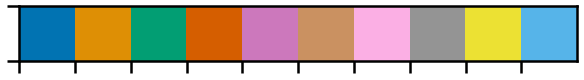

In [5]:
cmap = sns.color_palette('colorblind')
sns.palplot(cmap)

## Problem: there are a number of stars with anomalously high $\Delta P$ values. Why?

In [6]:
f_ati['exclude'] = np.zeros(len(f_ati))
dP = f_ati['P'] / f_col['P']
DP = f_ati['P'] - f_col['P']
f_ati.loc[dP > 2, 'exclude'] = 1
f_ati.loc[DP < -50, 'exclude'] = 0

dnus = f_ati['nus*'] / f_col['nus*']
f_ati.loc[dnus > 5, 'exclude'] = 2

# Di = f_ati['i']/f_col['i']
# f_ati.loc[Di > 5, 'exclude'] = 3

print(f'Stars before cut: {len(f_ati)}')
col = f_col[f_ati.exclude == 0]
ati = f_ati[f_ati.exclude == 0]
print(f'Stars after cut: {len(ati)}')
# ati = f_ati.copy()
# col = f_col.copy()

Stars before cut: 94
Stars after cut: 84


### Distribution comparison

In [7]:
def e(a, siga, b, sigb):
    #return sigma for a/b
    rhs = (siga / b)**2 + ((a*sigb)/b**2)**2
    return np.sqrt(rhs)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/Oliver/Dropbox/Apps/Overleaf/Malatium/Images/litcomp_alt2.pdf'

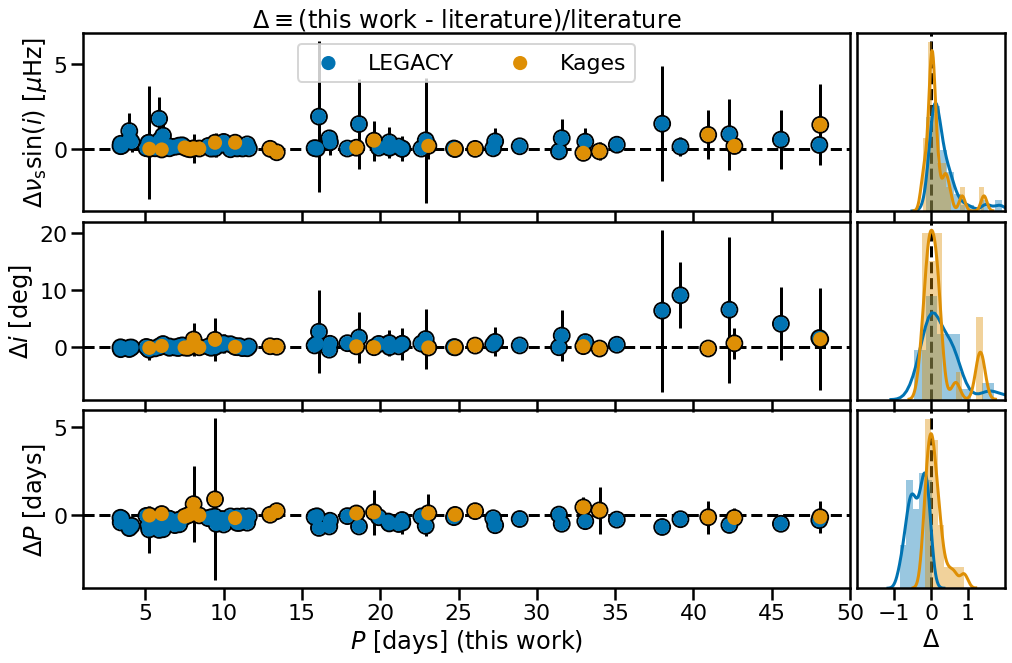

In [8]:
import warnings
import matplotlib.gridspec as gridspec
warnings.filterwarnings('ignore')

size=200
col['x'] = np.ones(len(col)) * 60

# fig, axes = plt.subplots(3, 1, figsize=mnras_size(2*595), sharex=True)
fig = plt.figure(figsize=mnras_size(2*595))
spec = gridspec.GridSpec(ncols=6, nrows=3, figure=fig)

ax2 = fig.add_subplot(spec[2, :5])
ax0 = fig.add_subplot(spec[0, :5], sharex=ax2)
ax1 = fig.add_subplot(spec[1, :5], sharex=ax2)
plt.setp(ax0.get_xticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)

# distplots
dax2 = fig.add_subplot(spec[2, 5:])
dax0 = fig.add_subplot(spec[0, 5:], sharex=dax2)
dax1 = fig.add_subplot(spec[1, 5:], sharex=dax2)

dax0.axvline(0., ls='--', zorder=0, c='k')
dax1.axvline(0., ls='--', zorder=0, c='k')
dax2.axvline(0., ls='--', zorder=0, c='k')

dax0.set_yticks([])
dax1.set_yticks([])
dax2.set_yticks([])
plt.setp(dax0.get_xticklabels(), visible=False)
plt.setp(dax1.get_xticklabels(), visible=False)


## plotting

pk = ati['P'][ati.source == 'K']
pl = ati['P'][ati.source == 'L']

#splitting
ak = ati['nus*'][ati.source == 'K']
ck = col['nus*'][ati.source == 'K']
al = ati['nus*'][ati.source == 'L']
cl = col['nus*'][ati.source == 'L']
Aerr = ati[['l_nus*','u_nus*']].max(axis=1)
Cerr = col[['l_nus*','u_nus*']].max(axis=1)

ax0.scatter(pl, al/cl - 1., s=size, ec='None', lw=1, zorder = 3, label='LEGACY')
ax0.scatter(pk, ak/ck - 1., s=size, ec='None', lw=1, zorder = 3, label='Kages')
ax0.scatter(pk, ak/ck - 1., s=size+50, ec='k', lw=2, fc='None', zorder = 2)
ax0.scatter(pl, al/cl - 1., s=size+50, ec='k', lw=2, fc='None', zorder = 2)
ax0.axhline(0., ls='--', zorder=1, c='k')
ax0.errorbar(ati['P'], ati['nus*']/col['nus*'] - 1.,
             yerr = e(ati['nus*'], Aerr, col['nus*'], Cerr), zorder=2, c='k', fmt='|')
ax0.set_ylabel(r'$\Delta\nu_{\rm s}\sin(i)$ [$\mu$Hz]')

sns.distplot(al/cl - 1., ax=dax0, hist_kws={"linewidth":3})
sns.distplot(ak/ck - 1., ax=dax0, hist_kws={"linewidth":3})


#inclination
ak = ati['i'][ati.source == 'K']
ck = col['i'][ati.source == 'K']
al = ati['i'][ati.source == 'L']
cl = col['i'][ati.source == 'L']
Aerr = ati[['l_i','u_i']].max(axis=1)
Cerr = col[['l_i','u_i']].max(axis=1)

ax1.scatter(pl, al/cl - 1., s=size, ec='None', lw=1, zorder = 3, label='LEGACY')
ax1.scatter(pk, ak/ck - 1., s=size, ec='None', lw=1, zorder = 3, label='Kages')
ax1.scatter(pk, ak/ck - 1., s=size+50, ec='k', lw=2, fc='None', zorder = 2)
ax1.scatter(pl, al/cl - 1., s=size+50, ec='k', lw=2, fc='None', zorder = 2)
ax1.axhline(0., ls='--', zorder=1, c='k')
ax1.errorbar(ati['P'], ati['i']/col['i'] - 1.,
             yerr = e(ati['i'], Aerr, col['i'], Cerr), zorder=2, c='k', fmt='|')
ax1.set_ylabel(r'$\Delta i$ [deg]')

sns.distplot(al/cl - 1., ax=dax1, hist_kws={"linewidth":3})
sns.distplot(ak/ck - 1., ax=dax1, hist_kws={"linewidth":3})

#rotation
ak = ati['P'][ati.source == 'K']
ck = col['P'][ati.source == 'K']
al = ati['P'][ati.source == 'L']
cl = col['P'][ati.source == 'L']
Aerr = ati[['l_P','u_P']].max(axis=1)
Cerr = col[['l_P','u_P']].max(axis=1)

ax2.scatter(pl, al/cl - 1., s=size, ec='None', lw=1, zorder = 3, label='LEGACY')
ax2.scatter(pk, ak/ck - 1., s=size, ec='None', lw=1, zorder = 3, label='Kages')
ax2.scatter(pk, ak/ck - 1., s=size+50, ec='k', lw=2, fc='None', zorder = 2)
ax2.scatter(pl, al/cl - 1., s=size+50, ec='k', lw=2, fc='None', zorder = 2)
ax2.axhline(0., ls='--', zorder=1, c='k')
ax2.errorbar(ati['P'], ati['P']/col['P'] - 1.,
             yerr = e(ati['P'], Aerr, col['P'], Cerr), zorder=2, c='k', fmt='|')
ax2.set_ylabel(r'$\Delta P$ [days]')

sns.distplot(al/cl - 1., ax=dax2, hist_kws={"linewidth":3})
sns.distplot(ak/ck - 1., ax=dax2, hist_kws={"linewidth":3})


ax2.set_xticks(np.arange(0, 60, 5))
ax2.set_xlim(1, 50)

ax0.set_title(r'$\Delta \equiv$(this work - literature)/literature')

plt.subplots_adjust(hspace=0.06, wspace=0.05)
dax2.set_xticks([-1, 0, 1])
dax2.set_xlim(-2, 2)
ax2.set_xlabel(r'$P$ [days] (this work)')
ax0.legend(ncol=2, loc='upper center')

dax0.set_xlabel(None)
dax1.set_xlabel(None)
dax2.set_xlabel(r'$\Delta$')

plt.savefig('/Users/Oliver/Dropbox/Apps/Overleaf/Malatium/Images/litcomp_alt2.pdf', bbox_inches='tight', rasterized=True)

## Comparing to other published literature

In [10]:
lit = pd.read_csv('../data/literature_seismo.csv', index_col=0)
ati = f_ati.copy()
lit.head(2)

,KIC,C15_P_rot,C15_eP_rot,D16_P_rot,D16_u_eP_rot,D16_l_eP_rot,N15_P_rot,N15_u_eP_rot,N15_l_eP_rot,B18_P_rot,B18_l_eP_rot,B18_u_eP_rot
0,1435467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2837475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
def e(a, siga, b, sigb):
    #return sigma for a/b
    rhs = (siga / b)**2 + ((a*sigb)/b**2)**2
    return np.sqrt(rhs)

In [12]:
col.columns

Index(['KIC', 'i', 'u_i', 'l_i', 'nus', 'l_nus', 'u_nus', 'nus*', 'l_nus*',
       'u_nus*', 'P', 'l_P', 'u_P', 'label', 'x'],
      dtype='object')

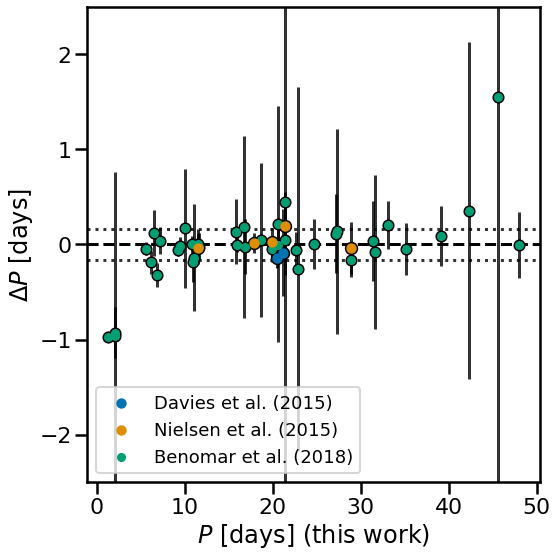

In [16]:
np.random.seed(11)

fig, ax = plt.subplots(figsize=mnras_size(595, square=True))

outA = (ati['P'] / lit['D16_P_rot']).dropna().values - 1.
Aerr = ati[['l_P','u_P']].max(axis=1)
Lerr = np.nanmax(lit[['D16_l_eP_rot','D16_u_eP_rot']],axis=1)
errA = e(ati['P'], Aerr, lit['D16_P_rot'], Lerr).dropna().values

xA = ati['P'][np.isfinite(lit['D16_P_rot']).values]
ax.scatter(xA, outA, s=70, zorder=5, label='Davies et al. (2015)')
ax.errorbar(xA, outA, yerr = errA, c='k', zorder=0, fmt='|', alpha=.8)

outB = (ati['P'] / lit['N15_P_rot']).dropna().values - 1.
Aerr = ati[['l_P','u_P']].max(axis=1)
Lerr = np.nanmax(lit[['N15_l_eP_rot','N15_u_eP_rot']],axis=1)
errB = e(ati['P'], Aerr, lit['N15_P_rot'], Lerr).dropna().values

xB = ati['P'][np.isfinite(lit['N15_P_rot']).values]
ax.scatter(xB, outB, s=70, zorder=4, label='Nielsen et al. (2015)')
ax.errorbar(xB, outB, yerr = errB, c='k', zorder=0, fmt='|', alpha=.8)

outD = (ati['P'] / lit['B18_P_rot']).dropna().values - 1.
Aerr = ati[['l_P','u_P']].max(axis=1)
Lerr = np.nanmax(lit[['B18_l_eP_rot','B18_u_eP_rot']],axis=1)
errD = e(ati['P'], Aerr, lit['B18_P_rot'], Lerr).dropna().values

xD = ati['P'][np.isfinite(lit['B18_P_rot']).values]
ax.scatter(xD, outD, s=50, zorder=2, label='Benomar et al. (2018)')
ax.errorbar(xD, outD, yerr = errD, c='k', zorder=0, fmt='|', alpha=.8)

ax.scatter(xA, outA, s=70, ec='k', lw=5, fc=None)
ax.scatter(xB, outB, s=70, ec='k', lw=5, fc=None)
ax.scatter(xD, outD, s=50, ec='k', lw=5, fc=None)

ax.axhline(0, ls='--', c='k', zorder=0, lw=3)
# ax.set_ylabel(r'$P_{\rm{rot, this\ work}} - P_{\rm rot,\ literature}$ [days]')
ax.set_xlabel(r'$P$ [days] (this work)')

ax.legend(loc='lower left', fontsize=18)
fig.tight_layout()

p = np.percentile(np.concatenate([outA, outB, outD]),[15.9, 50, 84.1])

ax.axhline(p[0], c='k', ls=':', alpha=.8, zorder=0, lw=3)
ax.axhline(p[2], c='k', ls=':', alpha=.8, zorder=0, lw=3)

ax.set_ylabel(r'$\Delta P$ [days]')
ax.set_ylim(-2.5, 2.5)

fig.tight_layout()

plt.savefig('natastron/Images/seis_comparison_rot_alt2.pdf', rasterized=True)
plt.savefig('natastron/Images/seis_comparison_rot_alt2.png', dpi=300)

In [97]:
p[1]

-0.0039645655423112824

In [98]:
p[1]-p[0]

0.15528437811441767

In [99]:
p[2]-p[1]

0.16353127570837991

## Graveyard

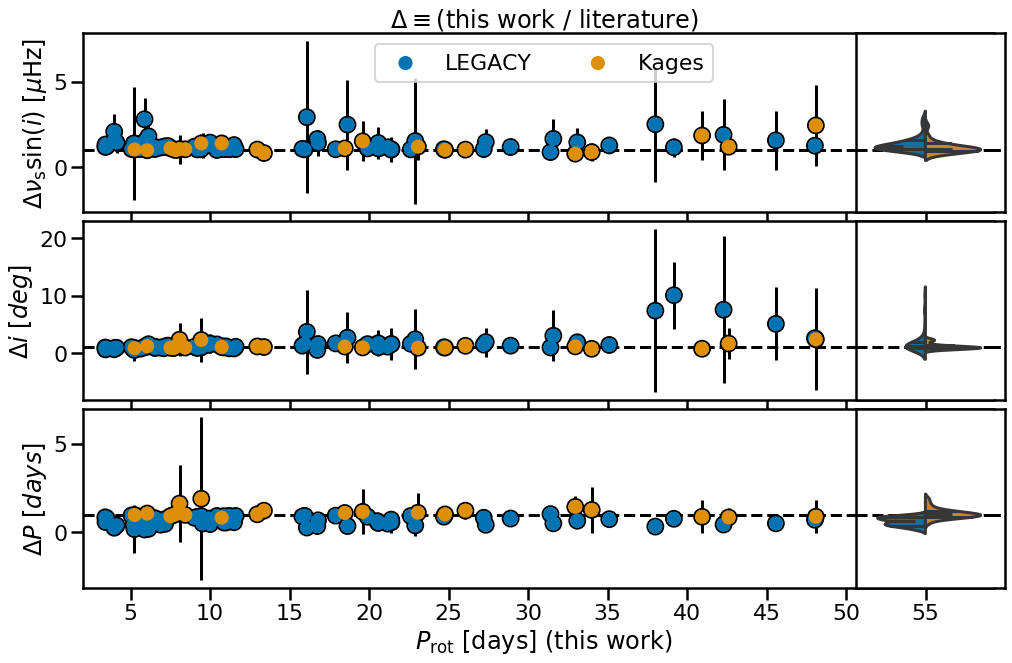

In [44]:
import warnings
warnings.filterwarnings('ignore')

size=200
col['x'] = np.ones(len(col)) * 60

fig, axes = plt.subplots(3, 1, figsize=mnras_size(2*595), sharex=True)

ax0 = axes[0]
ax1 = axes[1]
ax2 = axes[2]

pk = ati['P'][ati.source == 'K']
pl = ati['P'][ati.source == 'L']


#splitting
ak = ati['nus*'][ati.source == 'K']
ck = col['nus*'][ati.source == 'K']
al = ati['nus*'][ati.source == 'L']
cl = col['nus*'][ati.source == 'L']
Aerr = ati[['l_nus*','u_nus*']].max(axis=1)
Cerr = col[['l_nus*','u_nus*']].max(axis=1)

ax0.scatter(pl, al/cl, s=size, ec='None', lw=1, zorder = 3, label='LEGACY')
ax0.scatter(pk, ak/ck, s=size, ec='None', lw=1, zorder = 3, label='Kages')
ax0.scatter(pk, ak/ck, s=size+50, ec='k', lw=2, fc='None', zorder = 2)
ax0.scatter(pl, al/cl, s=size+50, ec='k', lw=2, fc='None', zorder = 2)
ax0.axhline(1., ls='--', zorder=1, c='k')
ax0.errorbar(ati['P'], ati['nus*']/col['nus*'],
             yerr = e(ati['nus*'], Aerr, col['nus*'], Cerr), zorder=2, c='k', fmt='|')
ax0.set_ylabel(r'$\Delta\nu_{\rm s}\sin(i)$ [$\mu$Hz]')

#inclination
ak = ati['i'][ati.source == 'K']
ck = col['i'][ati.source == 'K']
al = ati['i'][ati.source == 'L']
cl = col['i'][ati.source == 'L']
Aerr = ati[['l_i','u_i']].max(axis=1)
Cerr = col[['l_i','u_i']].max(axis=1)

ax1.scatter(pl, al/cl, s=size, ec='None', lw=1, zorder = 3, label='LEGACY')
ax1.scatter(pk, ak/ck, s=size, ec='None', lw=1, zorder = 3, label='Kages')
ax1.scatter(pk, ak/ck, s=size+50, ec='k', lw=2, fc='None', zorder = 2)
ax1.scatter(pl, al/cl, s=size+50, ec='k', lw=2, fc='None', zorder = 2)
ax1.axhline(1., ls='--', zorder=1, c='k')
ax1.errorbar(ati['P'], ati['i']/col['i'],
             yerr = e(ati['i'], Aerr, col['i'], Cerr), zorder=2, c='k', fmt='|')
ax1.set_ylabel(r'$\Delta i$ [$deg$]')

#inclination
ak = ati['P'][ati.source == 'K']
ck = col['P'][ati.source == 'K']
al = ati['P'][ati.source == 'L']
cl = col['P'][ati.source == 'L']
Aerr = ati[['l_P','u_P']].max(axis=1)
Cerr = col[['l_P','u_P']].max(axis=1)

ax2.scatter(pl, al/cl, s=size, ec='None', lw=1, zorder = 3, label='LEGACY')
ax2.scatter(pk, ak/ck, s=size, ec='None', lw=1, zorder = 3, label='Kages')
ax2.scatter(pk, ak/ck, s=size+50, ec='k', lw=2, fc='None', zorder = 2)
ax2.scatter(pl, al/cl, s=size+50, ec='k', lw=2, fc='None', zorder = 2)
ax2.axhline(1., ls='--', zorder=1, c='k')
ax2.errorbar(ati['P'], ati['P']/col['P'],
             yerr = e(ati['P'], Aerr, col['P'], Cerr), zorder=2, c='k', fmt='|')
ax2.set_ylabel(r'$\Delta P$ [$days$]')


# ax2.set_ylim(0)
# ax1.set_ylim(0)
# ax0.set_ylim(0)
# ax2.set_yscale('log')
# ax1.set_yscale('log')
# ax0.set_yscale('log')

from mpl_toolkits.axes_grid.inset_locator import inset_axes
col['Dnus*'] = ati['nus*'] / col['nus*']
col['Di'] = ati['i'] / col['i']
col['DP'] = ati['P'] / col['P']

# Violin 1
iax0 = inset_axes(ax0, height ="100%", width="15%", loc=7)
sns.violinplot(x='x', y='Dnus*', hue='label', 
               inner='quartile',
               data=col, palette=cmap, split=True, ax = iax0, legend=False)
iax0.spines['right'].set_visible(False)
iax0.spines['left'].set_visible(True)
iax0.get_xaxis().set_visible(False)
iax0.get_yaxis().set_visible(False)
iax0.axhline(1, ls='--', c='k', zorder=0)
iax0.legend_.remove()
iax0.set_ylim(ax0.get_ylim())

# Violin 2
iax1 = inset_axes(ax1, height ="100%", width="15%", loc=7)
sns.violinplot(x='x', y='Di', hue='label', data=col, 
                inner='quartile',
                palette=cmap, split=True, ax = iax1, legend=False)
iax1.spines['right'].set_visible(False)
iax1.spines['left'].set_visible(True)
iax1.get_xaxis().set_visible(False)
iax1.get_yaxis().set_visible(False)
iax1.axhline(1, ls='--', c='k', zorder=0)
iax1.legend_.remove()
iax1.set_ylim(ax1.get_ylim())

# Violin 2
iax2 = inset_axes(ax2, height ="100%", width="15%", loc=7)
sns.violinplot(x='x', y='DP', hue='label', data=col,
                inner='quartile',
                palette=cmap, split=True, ax = iax2, legend=False)
iax2.spines['right'].set_visible(False)
iax2.spines['left'].set_visible(True)
iax2.get_xaxis().set_visible(False)
iax2.get_yaxis().set_visible(False)
iax2.axhline(1, ls='--', c='k', zorder=0)
iax2.legend_.remove()
iax2.set_ylim(ax2.get_ylim())
ax0.legend(ncol=2, loc='upper center')# bbox_to_anchor=[0.63,1.25,0.0,0.0])

ax2.set_xticks(np.arange(0, 60, 5))

ax0.set_title(r'$\Delta \equiv$(this work / literature)')
ax2.set_xlim(2, 60)
ax2.set_xlabel(r'$P_{\rm rot}$ [days] (this work)')


plt.subplots_adjust(hspace=0.05)


plt.savefig('/Users/Oliver/Dropbox/Apps/Overleaf/Malatium/Images/litcomp_alt.pdf', bbox_inches='tight', rasterized=True)